# Исследование влияния результатов ЕГЭ на проходные баллы для различных программ бакалавриата ИТМО

* **Задача МО** - регрессия.
* **Задача модели МО** - предсказать проходной балл для выбранной программы

## Набор данных

* **name_program** - Название образовательной программы
* **ID** - ID для образовательной программы
* **year** - Год
* **av_score** - Средний балл ЕГЭ, поступивших на программу
* **fin_score**	- Проходной балл ЕГЭ для программы
* **av_ikt** - Средний балл ЕГЭ по информатике в России в определенном году
* **av_math** - Средний балл ЕГЭ по математике в России в определенном году
* **av_rus** - Средний балл ЕГЭ по русскому языку в России в определенном году
* **av_comb_russia** - Средний балл ЕГЭ за 3 предмета (МИР) в России в определенном году


In [ ]:
import pandas as pd
dataset = pd.read_excel('ITMOxHSE.xlsx')

In [ ]:
dataset.head(15)

,name_program,ID,year,av_score,fin_score,av_ikt,av_math,av_rus,av_comb_russia
0,01.03.02 Прикладная математика и информатика,1,2016,298.0,294,53.00,46.2,68.0,167.20
1,09.03.01 Информатика и вычислительная техника,2,2016,258.6,257,53.00,46.2,68.0,167.20
2,09.03.02 Информационные системы и технологии,3,2016,281.1,270,53.00,46.2,68.0,167.20
3,09.03.03 Прикладная информатика,4,2016,269.7,250,53.00,46.2,68.0,167.20
4,09.03.04 Программная инженерия,5,2016,268.2,251,53.00,46.2,68.0,167.20
5,10.03.01 Информационная безопасность,6,2016,266.7,250,53.00,46.2,68.0,167.20
6,11.03.02 Инфокоммуникационные технологии и сис...,7,2016,254.7,254,53.00,46.2,68.0,167.20
7,11.03.03 Конструирование и технология электрон...,8,2016,242.7,250,53.00,46.2,68.0,167.20
8,12.03.01 Приборостроение,9,2016,235.8,237,53.00,46.2,68.0,167.20
9,13.03.02 Электроэнергетика и электротехника,10,2016,236.4,235,53.00,46.2,68.0,167.20


## Выбор метрики

Для данной задачи выбраны метрика **RMSE** - квадратный корень из MSE, что делает его особенно полезным, так как он измеряет среднеквадратичную ошибку в тех же единицах, что и целевая переменная.
В данном случае, из-за наличия категориального признака, для оценки модели будет также использована метрика, учитывающая категориальную переменную, такая как **Adjusted R-squared**.

## EDA (первичный анализ данных)

График зависимости "усредненного" среднего балла в зависимости от года

In [ ]:
average_scores_by_year = dataset.groupby('year')['av_score'].mean()

print(average_scores_by_year)

year
2016    260.508333
2017    269.425000
2018    271.675000
2019    277.750000
2020    277.675000
2021    280.225000
2022    279.700000
2023    275.500000
Name: av_score, dtype: float64


Text(0, 0.5, 'Средний балл ЕГЭ')

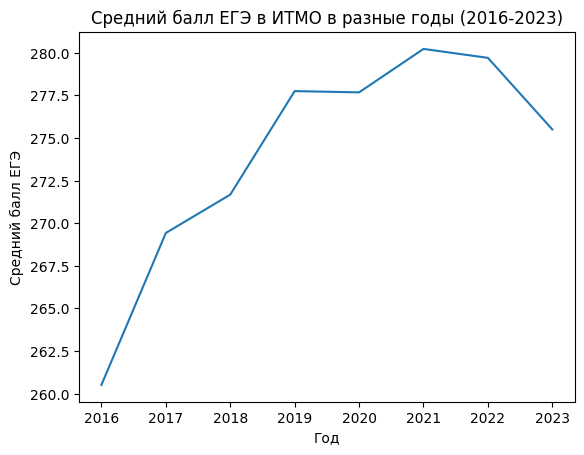

In [ ]:
import matplotlib.pyplot as plt

plt.plot(average_scores_by_year)
plt.title('Средний балл ЕГЭ в ИТМО в разные годы (2016-2023)')
plt.xlabel('Год')
plt.ylabel('Средний балл ЕГЭ')

График зависимости "усредненного" проходного балла в зависимости от года

In [ ]:
average_fin_scores_by_year = dataset.groupby('year')['fin_score'].mean()

print(average_fin_scores_by_year)

year
2016    253.500000
2017    270.500000
2018    266.666667
2019    279.250000
2020    277.583333
2021    277.750000
2022    265.333333
2023    273.916667
Name: fin_score, dtype: float64


Графики зависимостей проходного балла в зависимости от года для каждой программы

Text(0, 0.5, 'Средний проходной балл ЕГЭ')

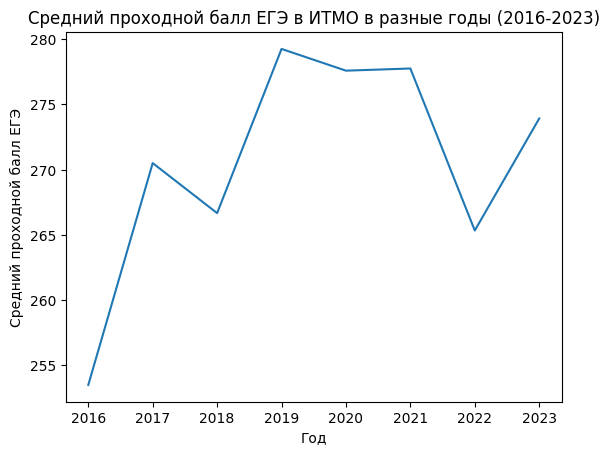

In [ ]:
plt.plot(average_fin_scores_by_year)
plt.title('Средний проходной балл ЕГЭ в ИТМО в разные годы (2016-2023)')
plt.xlabel('Год')
plt.ylabel('Средний проходной балл ЕГЭ')

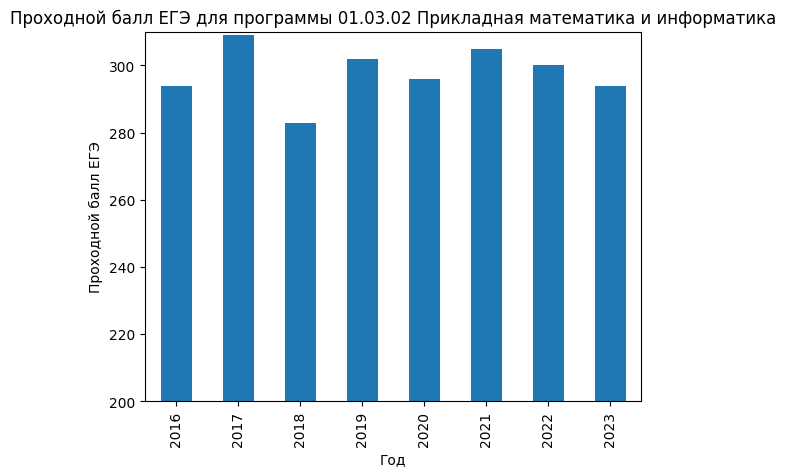

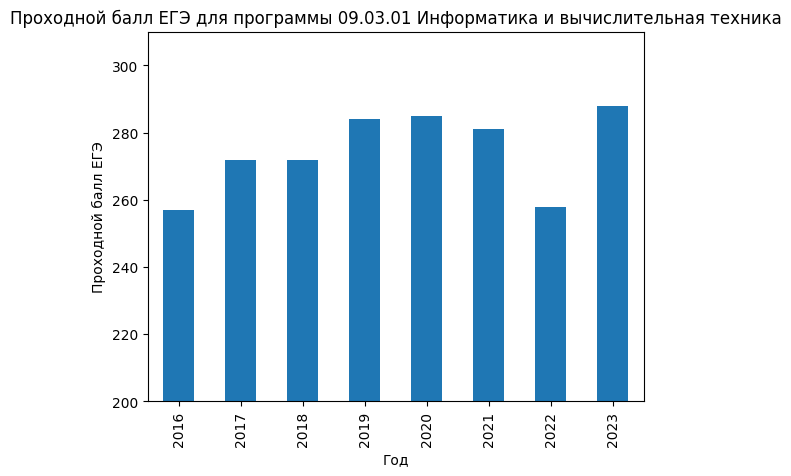

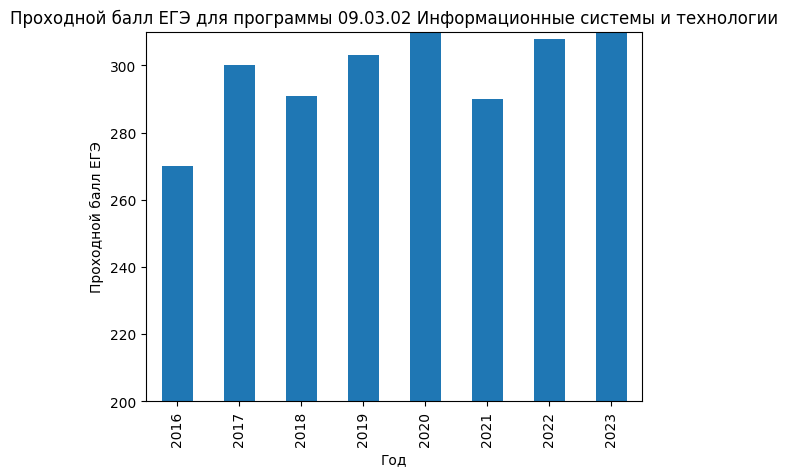

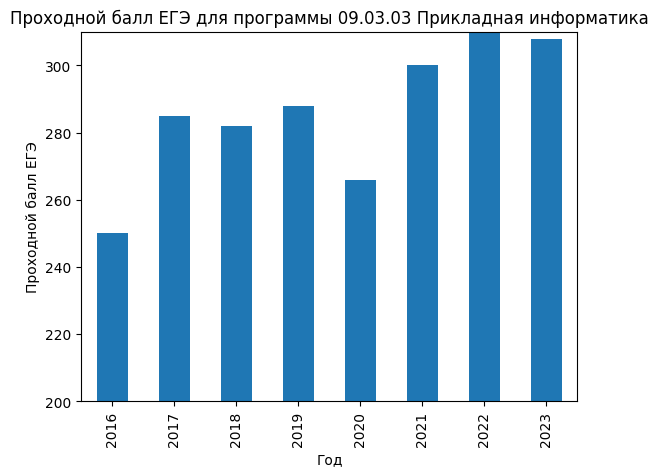

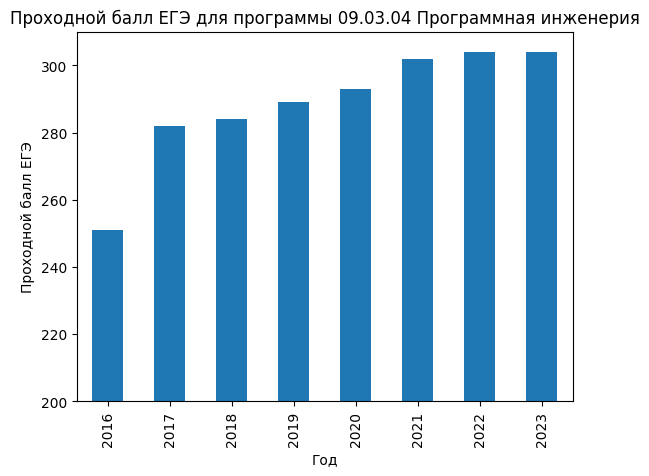

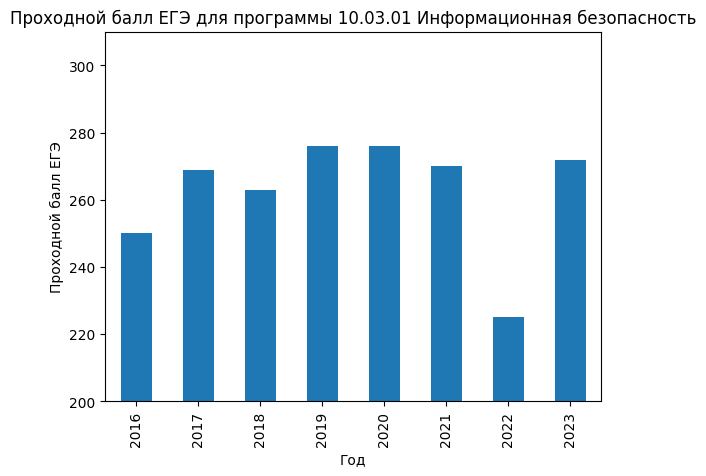

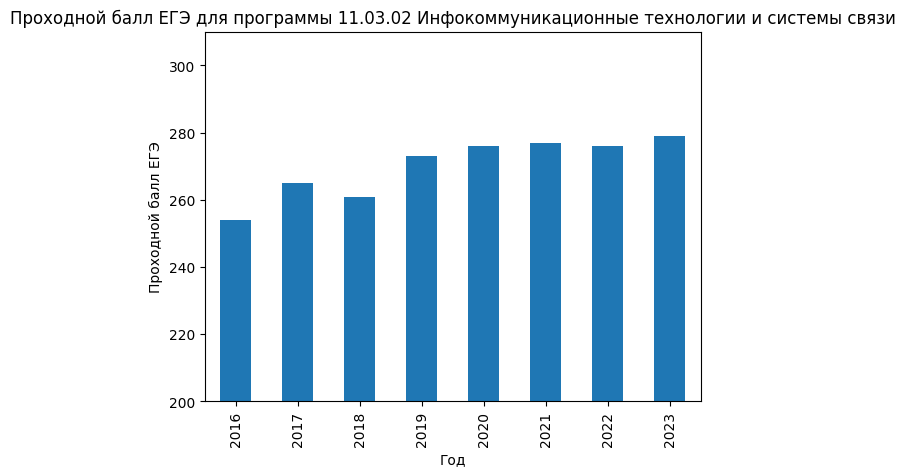

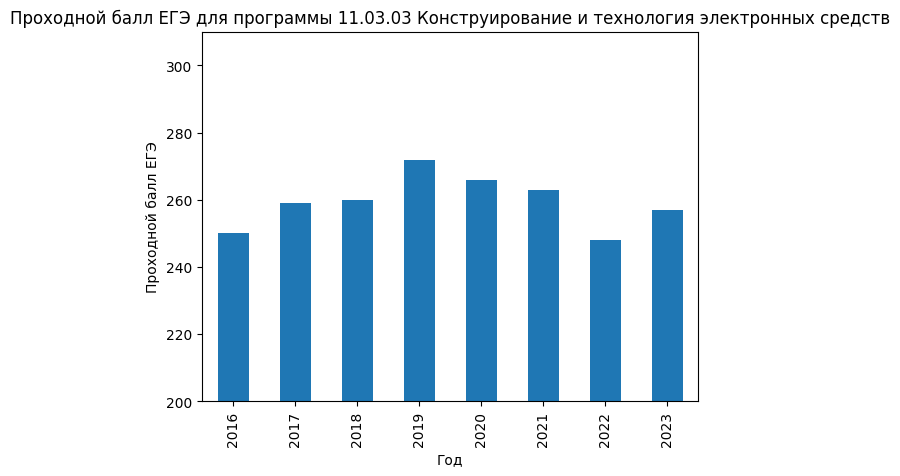

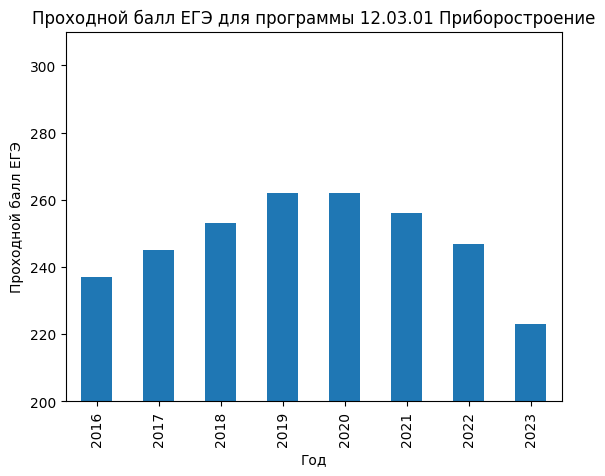

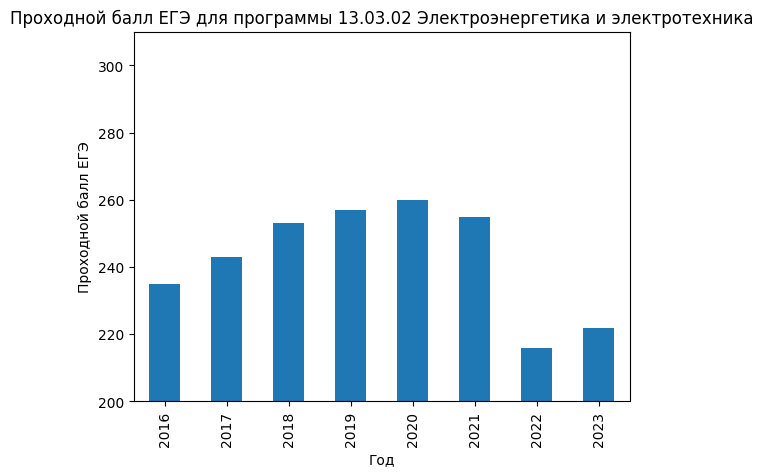

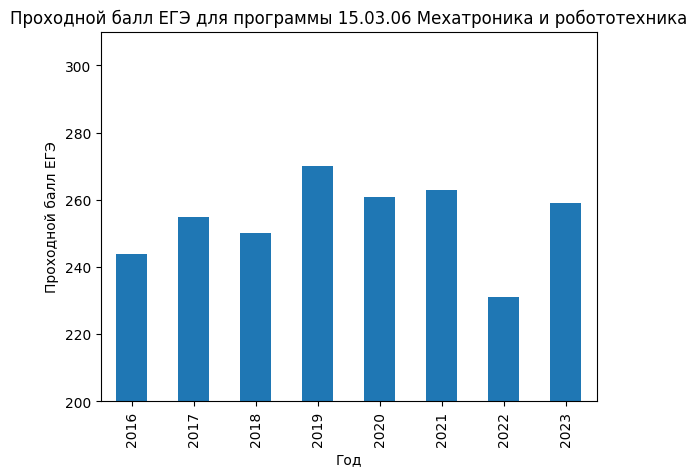

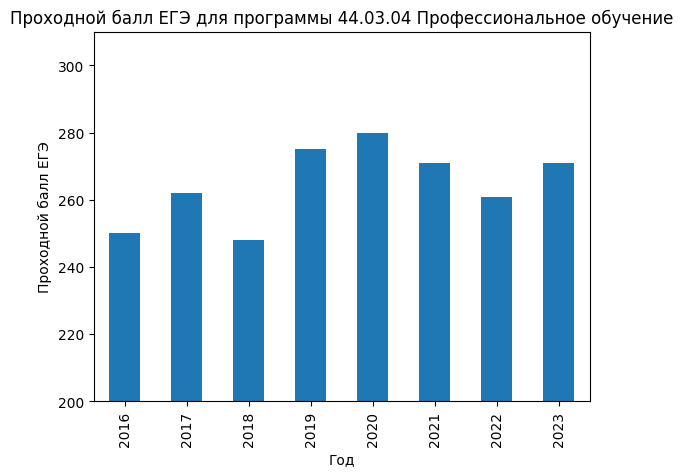

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

for i in range(1, 13):

  filtered_data = dataset[dataset['ID'] == i]

  name = dataset[dataset['ID'] == i]['name_program']
  name = name.unique()
  name = name[0]

  average_fin_score_by_year = filtered_data.groupby('year')['fin_score'].mean()

  average_fin_score_by_year.plot(kind='bar')
  plt.ylim(200, 310)
  title = 'Проходной балл ЕГЭ для программы ' + name
  plt.title(title)
  plt.xlabel('Год')
  plt.ylabel('Проходной балл ЕГЭ')
  plt.show()

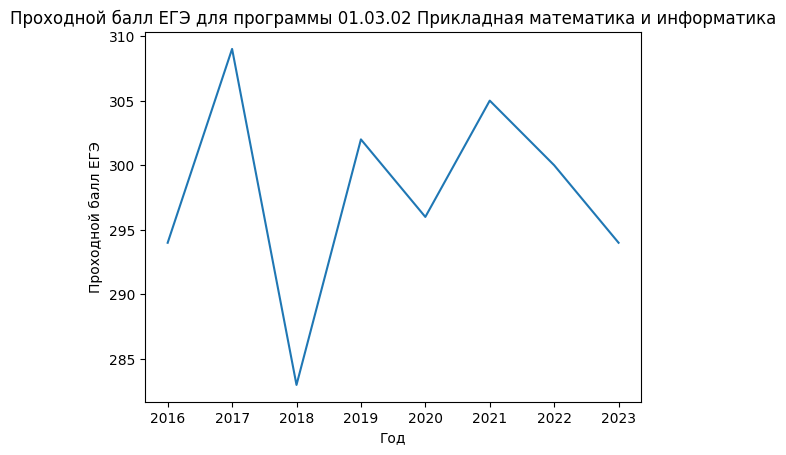

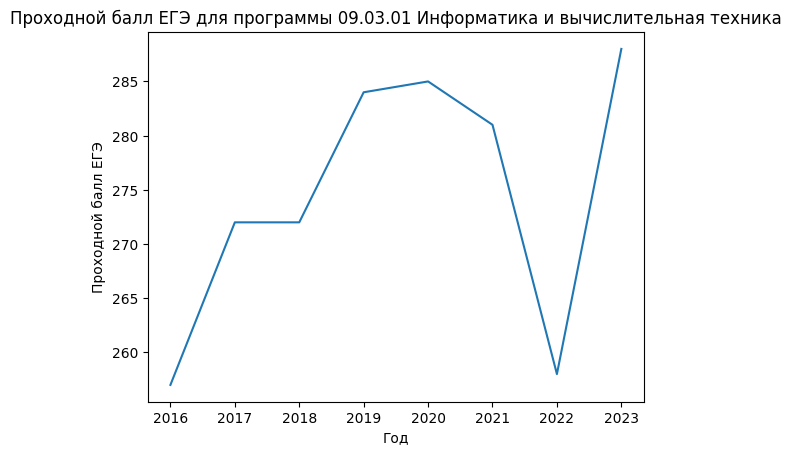

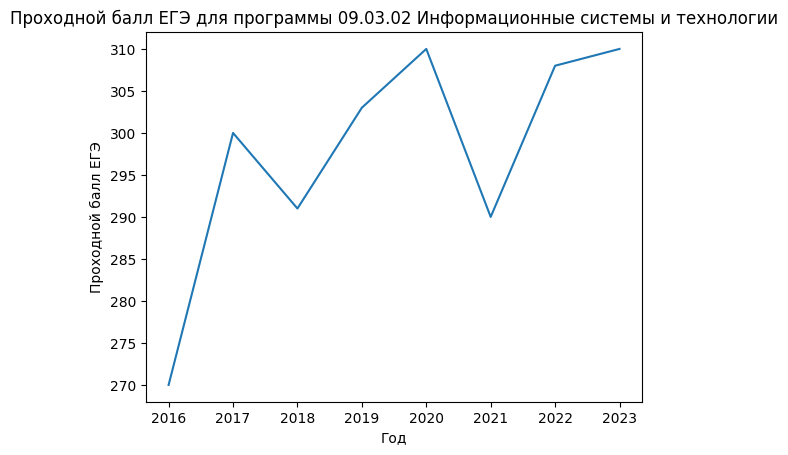

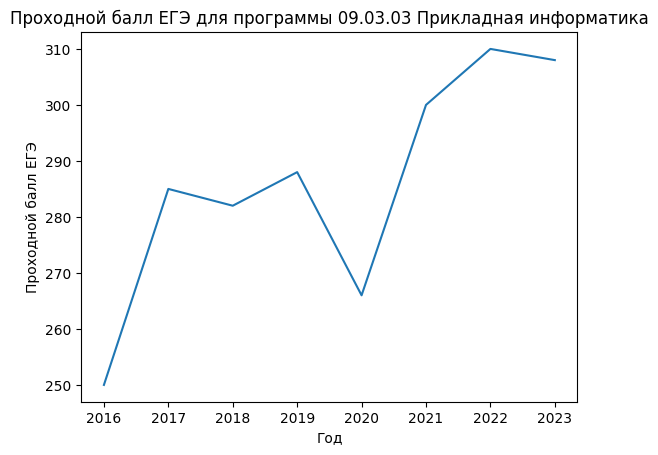

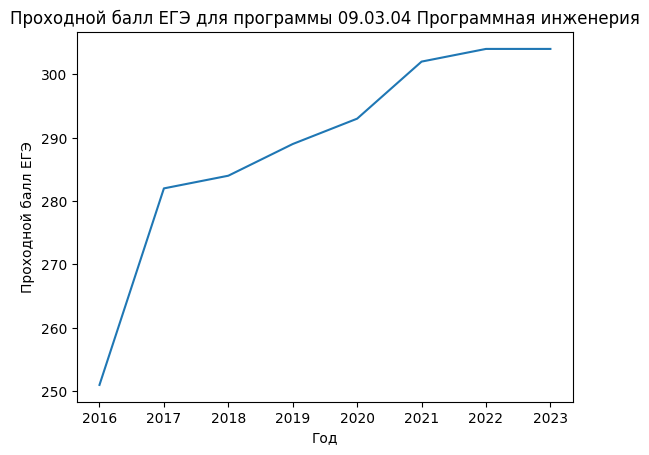

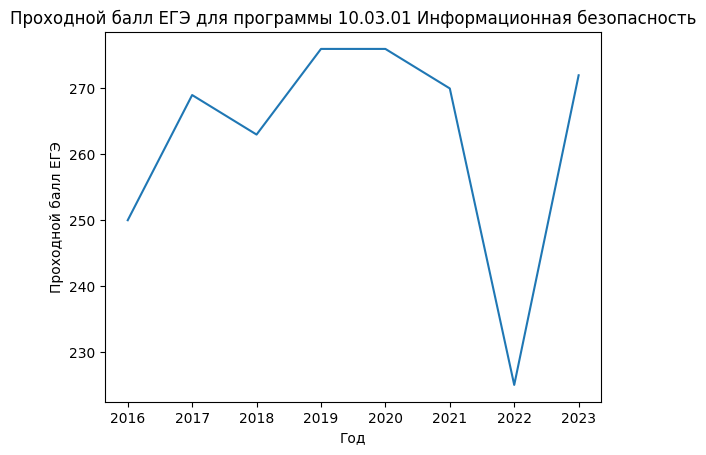

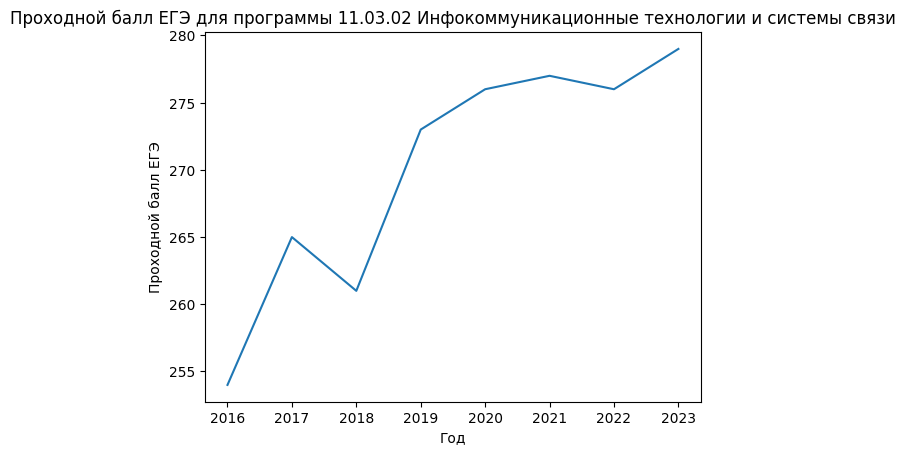

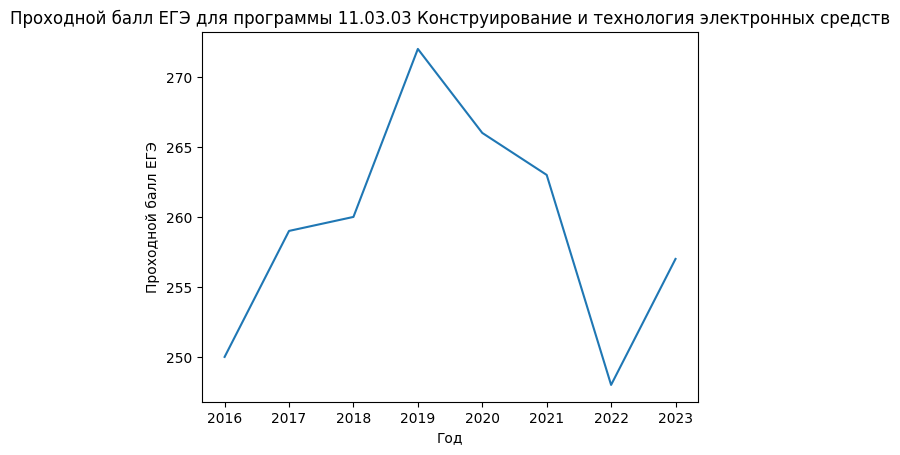

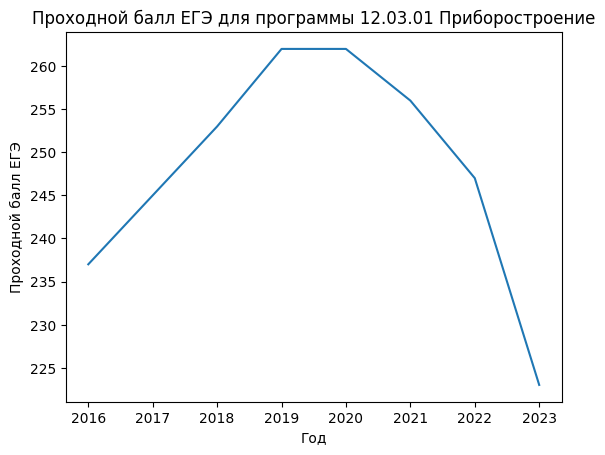

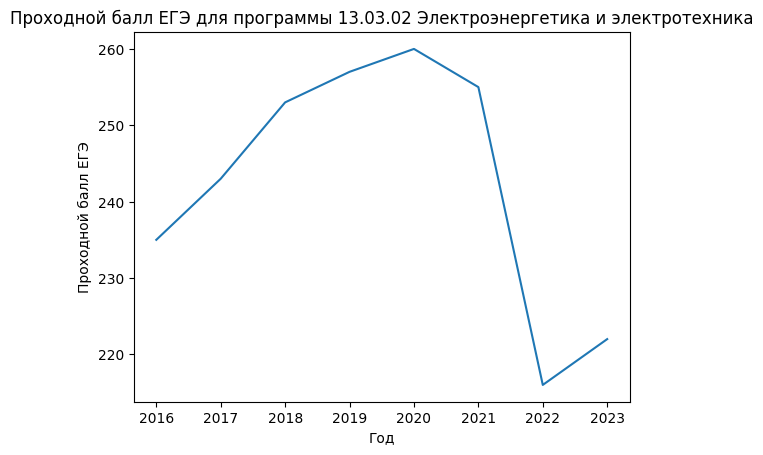

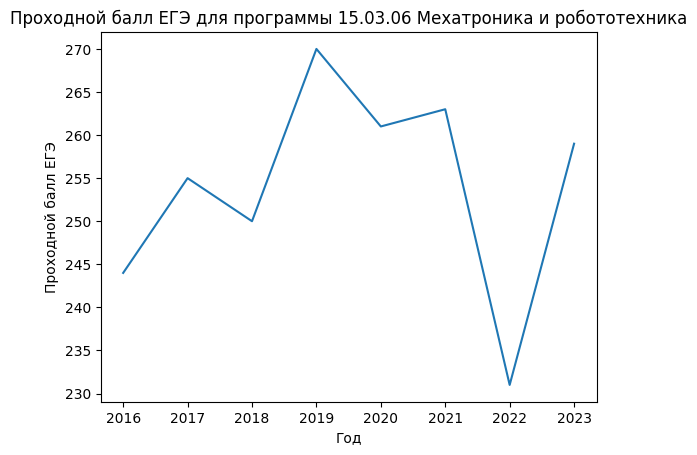

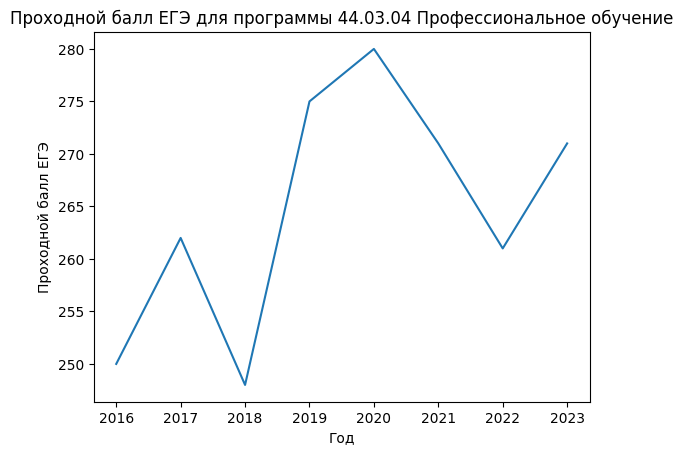

In [ ]:
for i in range(1, 13):

  filtered_data = dataset[dataset['ID'] == i]

  name = dataset[dataset['ID'] == i]['name_program']
  name = name.unique()
  name = name[0]

  average_fin_score_by_year = filtered_data.groupby('year')['fin_score'].mean()

  average_fin_score_by_year.plot()
  #plt.ylim(200, 310)
  title = 'Проходной балл ЕГЭ для программы ' + name
  plt.title(title)
  plt.xlabel('Год')
  plt.ylabel('Проходной балл ЕГЭ')
  plt.show()

Исходя из полученных визуализаций, можно сделать вывод, что в 2022-м году значение проходного балла было аномально низким.

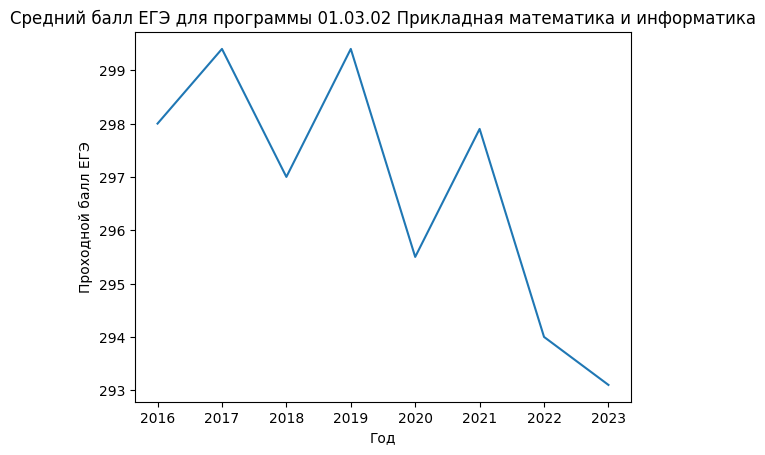

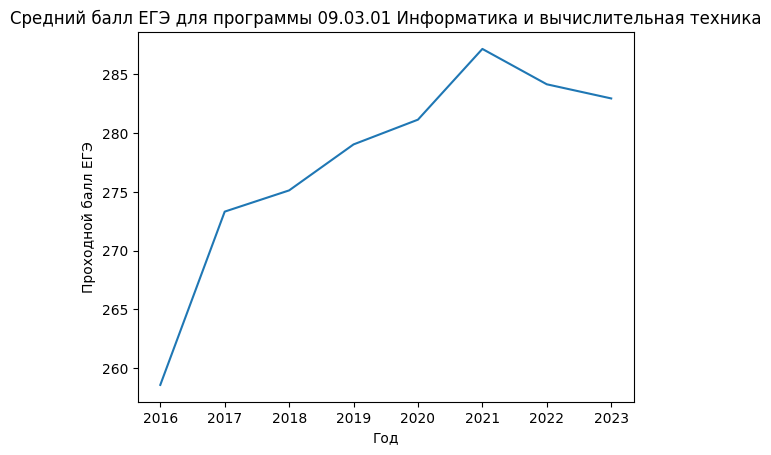

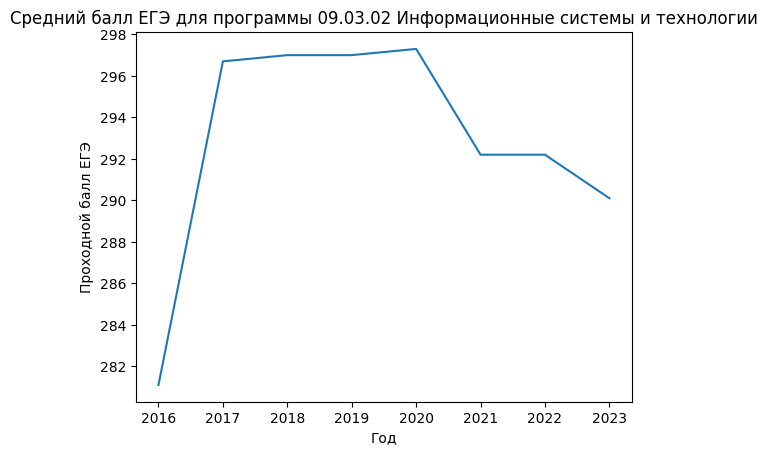

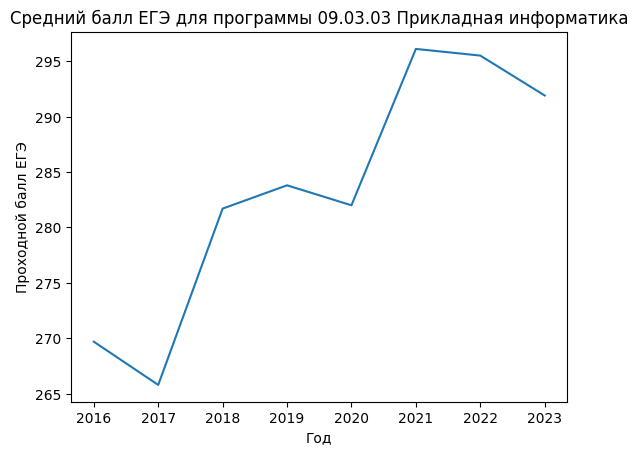

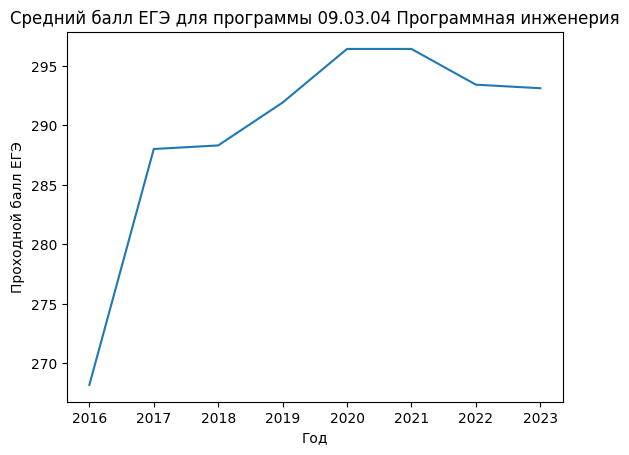

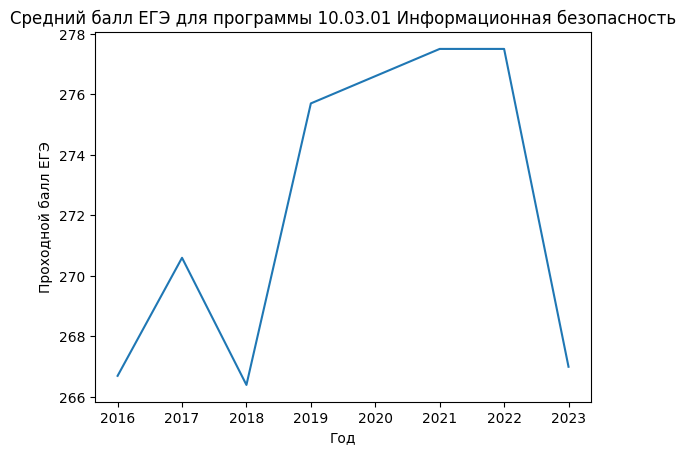

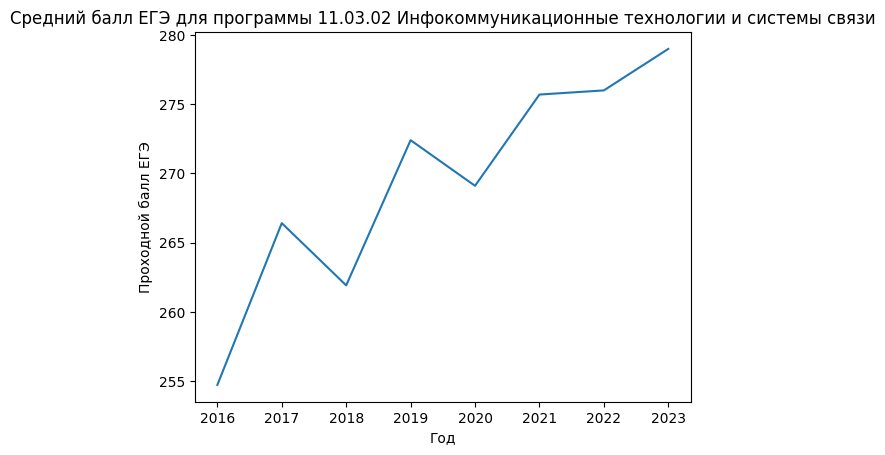

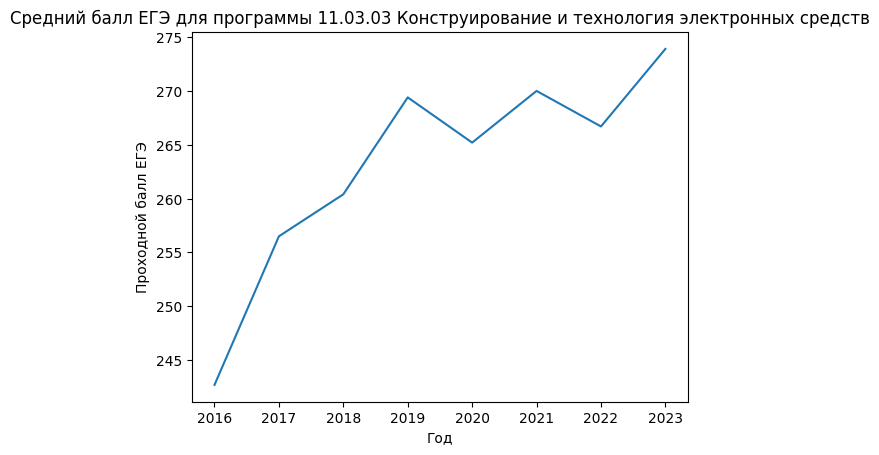

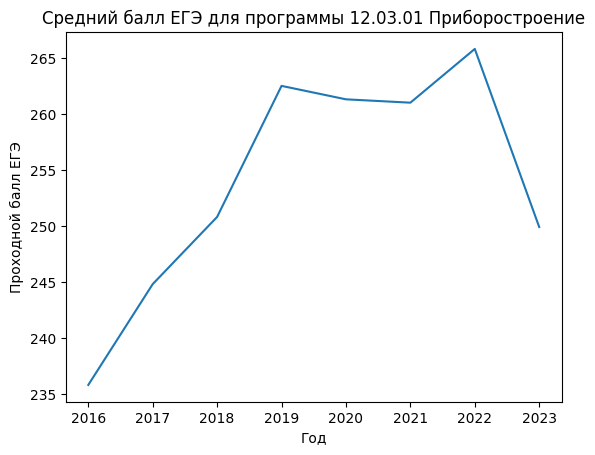

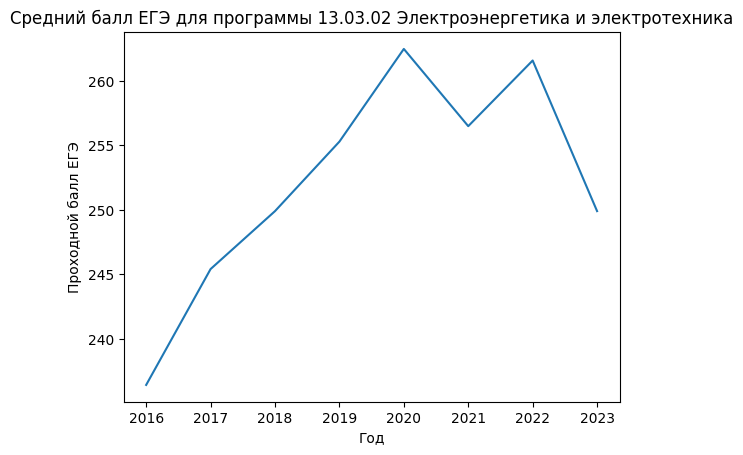

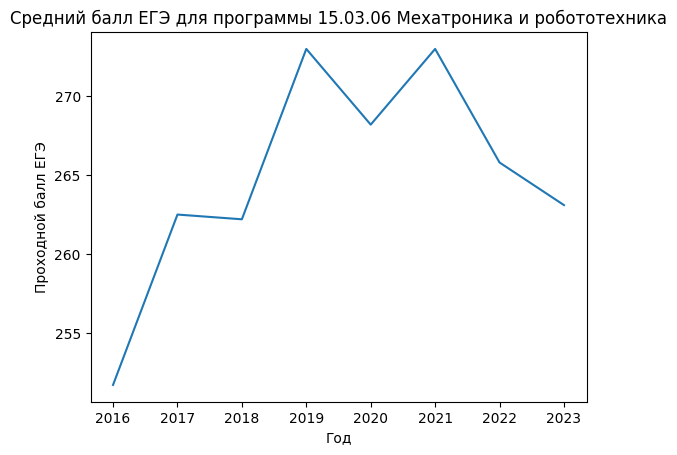

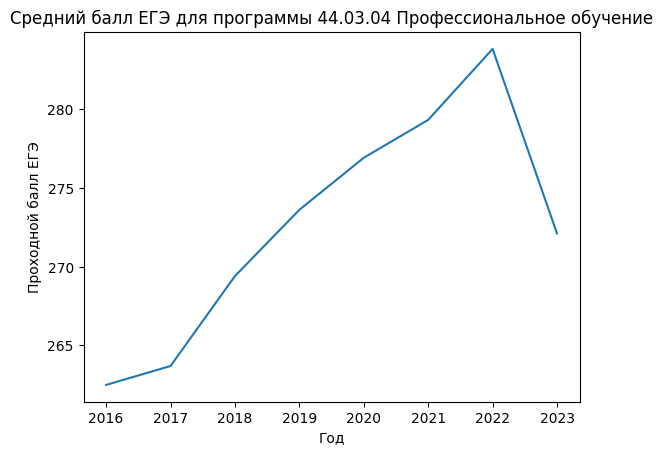

In [ ]:
for i in range(1, 13):

  filtered_data = dataset[dataset['ID'] == i]

  name = dataset[dataset['ID'] == i]['name_program']
  name = name.unique()
  name = name[0]

  average_score_by_year = filtered_data.groupby('year')['av_score'].mean()

  average_score_by_year.plot()
  #plt.ylim(200, 310)
  title = 'Средний балл ЕГЭ для программы ' + name
  plt.title(title)
  plt.xlabel('Год')
  plt.ylabel('Проходной балл ЕГЭ')
  plt.show()

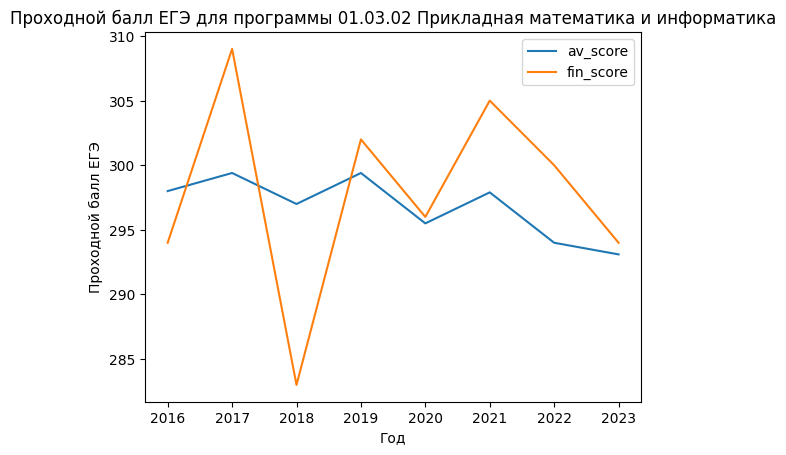

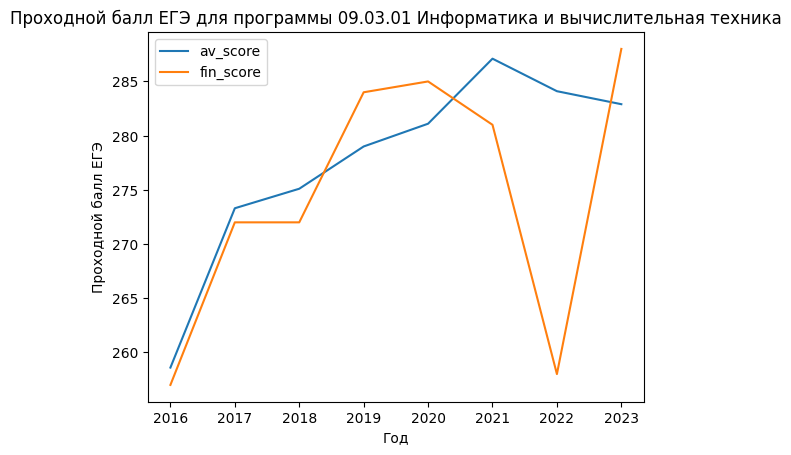

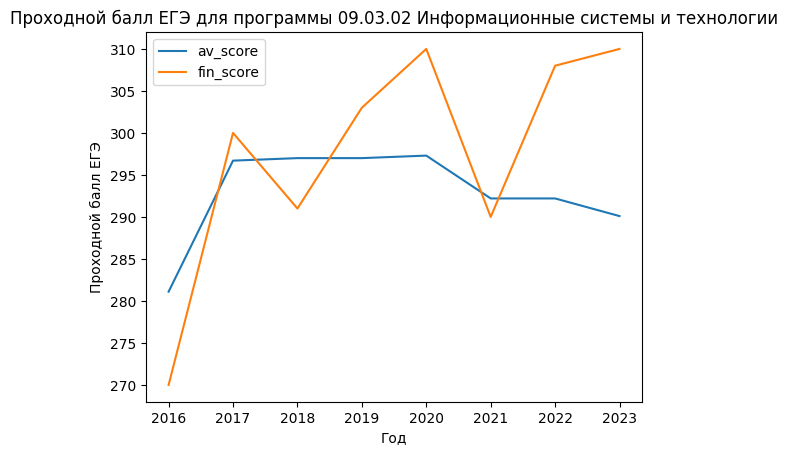

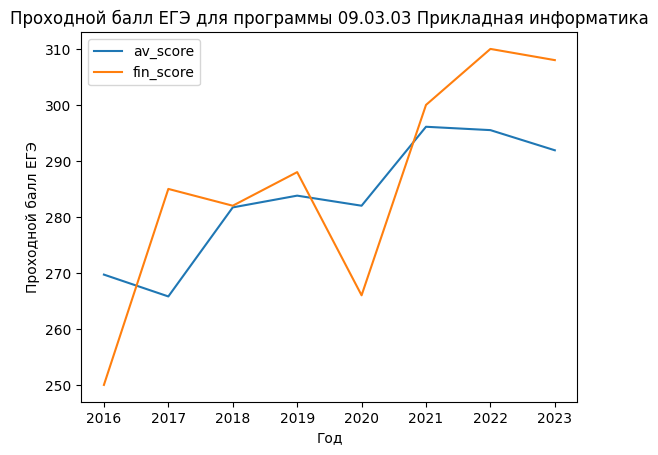

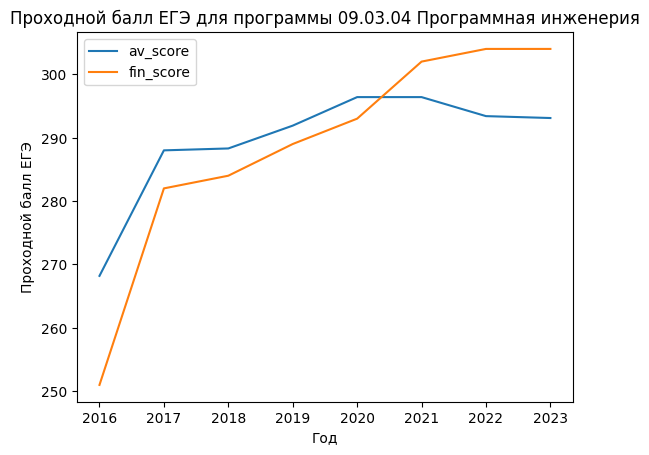

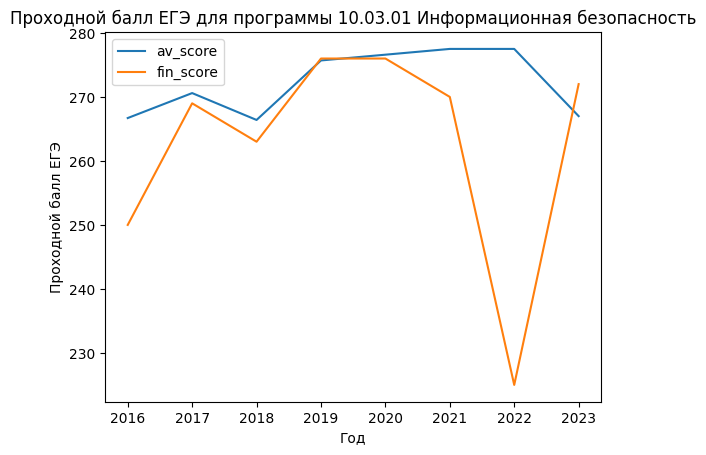

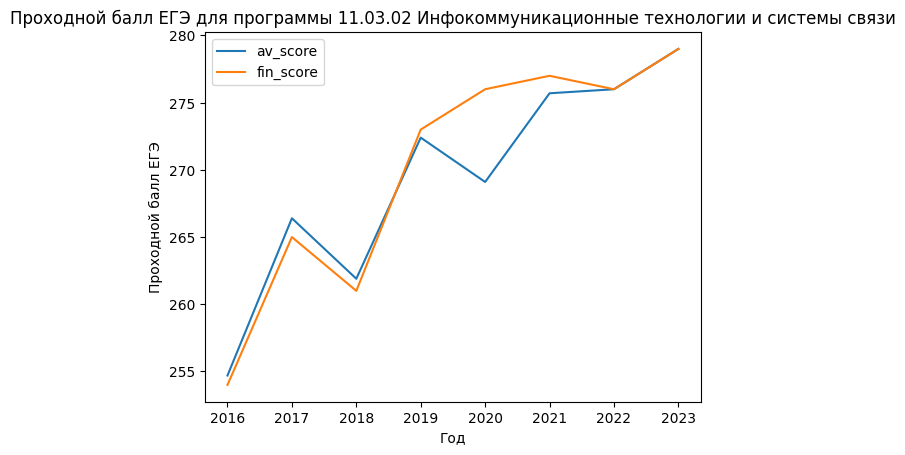

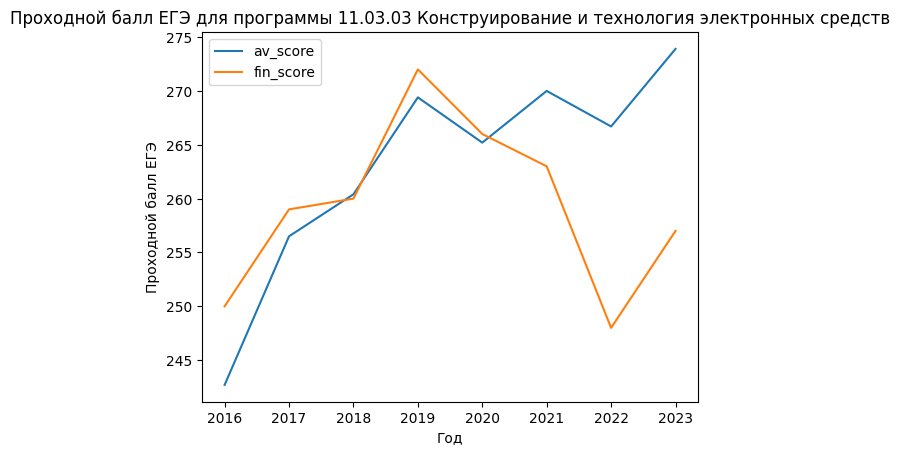

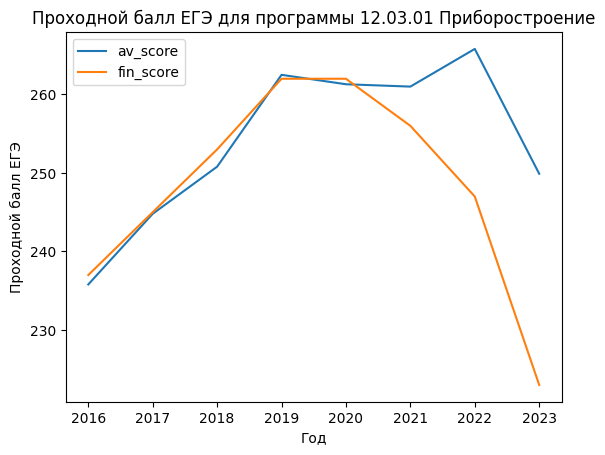

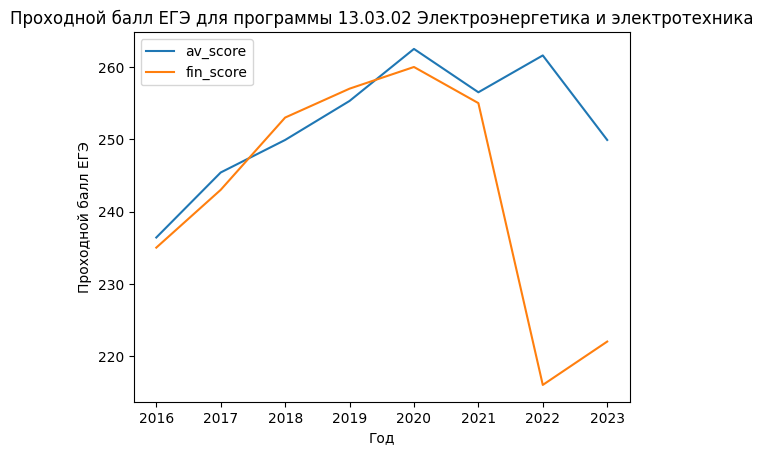

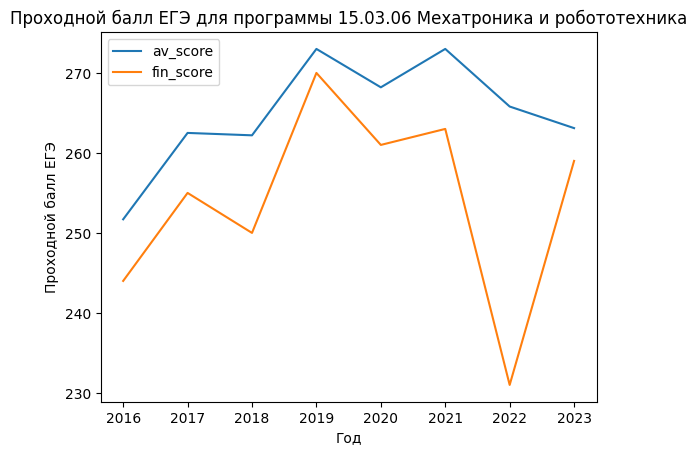

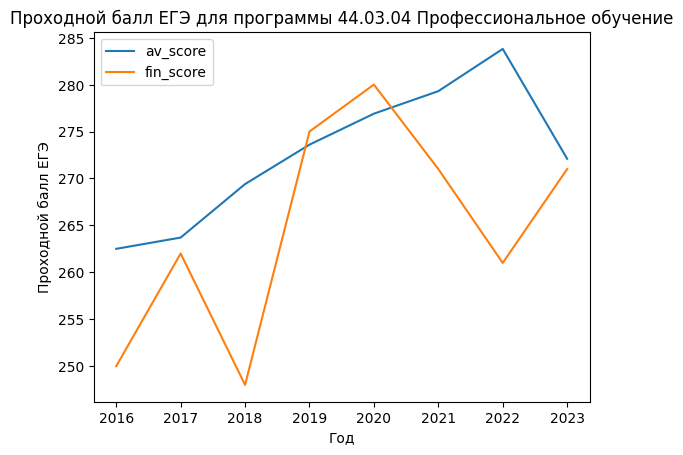

In [ ]:
for i in range(1, 13):

  filtered_data = dataset[dataset['ID'] == i]

  name = dataset[dataset['ID'] == i]['name_program']
  name = name.unique()
  name = name[0]

  average_score_by_year = filtered_data.groupby('year')['av_score'].mean()

  average_score_by_year.plot()
  #plt.ylim(200, 310)
  title = 'Средний балл ЕГЭ для программы ' + name
  plt.title(title)
  plt.xlabel('Год')
  plt.ylabel('Проходной балл ЕГЭ')


  average_fin_score_by_year = filtered_data.groupby('year')['fin_score'].mean()

  average_fin_score_by_year.plot()
  #plt.ylim(200, 310)
  title = 'Проходной балл ЕГЭ для программы ' + name
  plt.title(title)
  plt.xlabel('Год')
  plt.ylabel('Проходной балл ЕГЭ')
  plt.legend()
  plt.show()

  plt.show()

Между значениями среднего и проходного балла также можно обнаружить корреляции (за исключением 2022 года).

Выбросы, связанные с 2022-м годом, можно объяснить тем, что это был первый год, когда абитуриенты поступали в одну волну с изменением способа подачи документов.